In [1]:
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt

In [2]:
baba = pdr.DataReader('BABA',data_source='yahoo')

In [3]:
amza = pdr.get_data_yahoo('AMZN')

In [4]:
baba.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-11-12,146.406006,139.970001,145.009995,142.820007,16516500,142.820007
2018-11-13,149.940002,143.910004,144.830002,146.979996,19575100,146.979996
2018-11-14,152.149994,148.440002,150.210007,150.440002,21786000,150.440002
2018-11-15,157.399994,150.889999,152.899994,156.220001,30050100,156.220001
2018-11-16,155.759995,152.979996,155.039993,154.050003,2396364,154.050003


In [5]:
amza.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,137.279999,134.520004,137.089996,134.520004,4523000,134.520004
2010-01-04,136.610001,133.139999,136.250000,133.899994,7599900,133.899994
2010-01-05,135.479996,131.809998,133.429993,134.690002,8851900,134.690002
2010-01-06,134.729996,131.649994,134.600006,132.250000,7178800,132.250000
2010-01-07,132.320007,128.800003,132.009995,130.000000,11030200,130.000000


# 统计每日跌涨
## 方法一
* 条件查询、赋值
* 统计

In [6]:
baba['diff'] = baba['Close'] - baba['Open']

In [7]:
baba.loc[baba['diff']>0,'diff'] = 1

In [8]:
baba.loc[baba['diff']<0,'diff'] = -1

In [9]:
baba['diff'].value_counts()

-1.0    560
 1.0    484
 0.0      6
Name: diff, dtype: int64

## 方法二
* 添加辅助列rise,false
* 统计
* 且为之后的其他做计算铺垫

In [10]:
baba['rise'] = baba['diff']>0

In [11]:
baba['false'] = baba['diff']<0

In [12]:
baba[['rise','false']].sum()

rise     484
false    560
dtype: int64

In [13]:
baba['false'].value_counts()

True     560
False    490
Name: false, dtype: int64

# 计算本月跌落次数
 * 方法一

In [14]:
baba.loc[baba.index>='2018-11-01',['rise','false']].sum()

rise     6
false    6
dtype: int64

* 方法二

In [15]:
baba.loc[baba.index>='2018-11-01','diff'].value_counts()

-1.0    6
 1.0    6
Name: diff, dtype: int64

# 计算每月跌涨次数

In [16]:
#baba.groupby([baba.index.year,baba.index.month])['rise','false'].sum()
#个人认为这是由于两级的索引名称重名导致的，传入groupby时重命名各级所以很难即可解决

In [17]:
baba.groupby([baba.index.year.rename('year'),baba.index.month.rename('month')])['rise','false'].sum().unstack()

rise                                                        ...  false  \
month    1     2     3     4     5     6     7     8     9     10  ...     3    
year                                                               ...          
2014    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   3.0  11.0  ...    NaN   
2015    7.0   6.0   9.0   5.0   9.0   7.0   7.0   9.0  12.0  17.0  ...   13.0   
2016    8.0  11.0  14.0  10.0  12.0  11.0  11.0  15.0  12.0   5.0  ...    8.0   
2017    9.0   7.0  13.0  10.0   9.0   9.0  10.0  11.0   9.0  11.0  ...   10.0   
2018   11.0   6.0  12.0   9.0  13.0  11.0   7.0   8.0   7.0   9.0  ...    9.0   

                                                             
month    4     5     6     7     8     9     10    11    12  
year                                                         
2014    NaN   NaN   NaN   NaN   NaN   5.0  11.0   9.0  11.0  
2015   16.0  11.0  15.0  15.0  11.0   9.0   5.0   9.0  12.0  
2016   11.0   9.0  11.0   9.0   8.0   9.0  16.0  13.0  10.0  
2017    9.0  13.0  13.0   9.0  12.0  11.0  11.0  14.0   9.0  
2018   12.0   9.0  10.0  14.0  15.0  12.0  14.0   6.0   NaN  

[5 rows x 24 columns]

In [18]:
baba['ret'] = baba['Close'].pct_change()

# 计算每月平均

In [19]:
baba.groupby([baba.index.year.rename('year'),baba.index.month.rename('month')])['ret'].mean().unstack()

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.007505,0.004684,0.006855,-0.003032
2015,-0.007300,-0.002288,-0.000887,-0.001013,0.004937,-0.003658,-0.002132,-0.007696,-0.005081,0.016434,0.000327,-0.001356
2016,-0.009706,0.001661,0.006436,-0.001206,0.003305,-0.001149,0.001888,0.007348,0.004273,-0.001821,-0.003607,-0.003149
2017,0.007288,0.000880,0.002091,0.003665,0.002735,0.006849,0.004848,0.004639,0.000427,0.003246,-0.001952,-0.001213
2018,0.008322,-0.004554,-0.000307,-0.001120,0.004792,-0.002895,0.000592,-0.002801,-0.002929,-0.005824,0.007076,NaN


In [20]:
%matplotlib inline

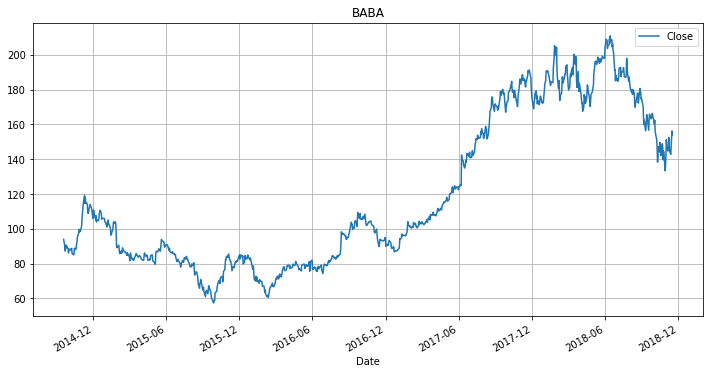

In [21]:
baba['Close'].plot(legend=True,grid=True,figsize=(12,6),title='BABA')

# 绘制移动平均线

In [22]:
baba['mvg30'] = baba['Close'].rolling(window=30).mean()

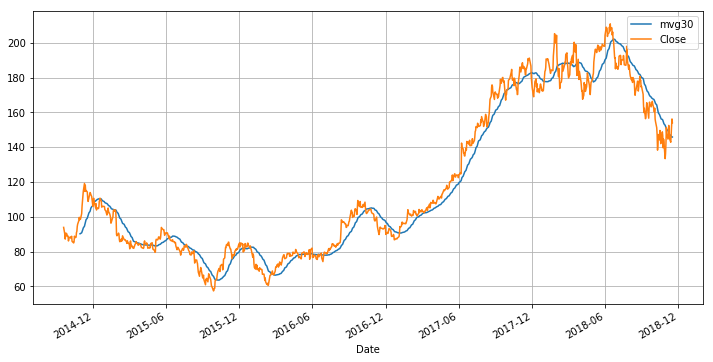

In [23]:
baba[['mvg30','Close']].plot(figsize=(12,6),grid=True,legend=True)

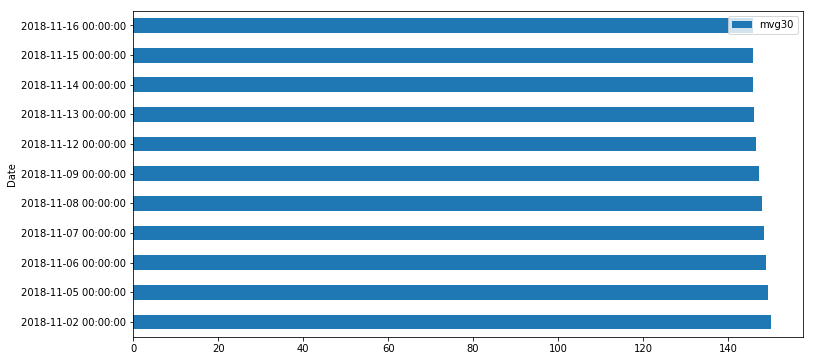

In [24]:
baba.loc[baba.index>'2018-11-1',['mvg30']].plot.barh(figsize=(12,6))

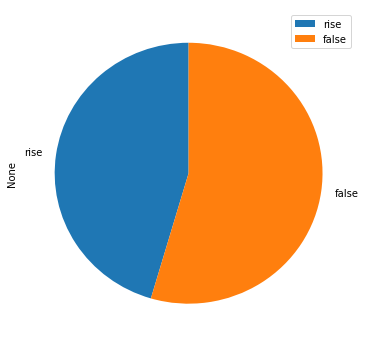

In [25]:
baba[['rise','false']].loc[baba.index>'2018-11-1'].sum().plot.pie(figsize=(6,6),legend=True,startangle=90)

* 2018-11-1至2018-11-16涨跌几乎一致
* 由此可知，饼图的缺点——不精确啊

* 多列饼图

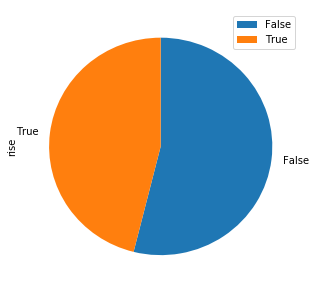

In [26]:
baba['rise'].value_counts().plot.pie(figsize=(5,5),counterclock=False,startangle=90,legend=True)

* 列的构成

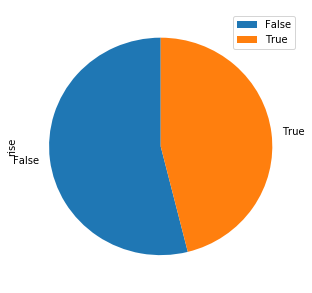

In [27]:
baba['rise'].value_counts().plot.pie(figsize=(5,5),counterclock=True,startangle=90,legend=True)